## _Time Series Forecasting_

**The script implements an Time Series LSTM model to predict a point estimate of the 
stock price for the company of interest. This script predict stock price of GE**

### _Import Libraries_

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler  

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
# from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


### _Read and Explore Data_

In [2]:
stock_data = pd.read_csv("GE.csv", header = 0)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-28,22.440001,22.540001,22.26,22.500000,18.283457,49558400
1,2013-01-29,22.490000,22.580000,22.40,22.500000,18.283457,34148000
2,2013-01-30,22.520000,22.549999,22.23,22.230000,18.064051,36200400
3,2013-01-31,22.209999,22.400000,22.18,22.280001,18.104687,34427700
4,2013-02-01,22.430000,22.639999,22.32,22.620001,18.380978,43840300


In [3]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

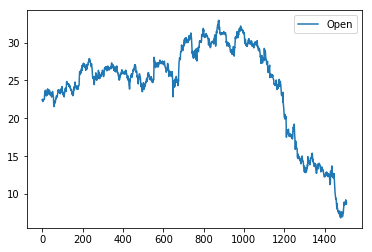

In [5]:
stock_data[['Date','Open']].plot()

In [6]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### _Filter data for dates of interest_

In [97]:
filter_train = (stock_data['Date'] <= '2018-12-1')
filter_test = (stock_data['Date'] > '2018-12-1')

train_data = stock_data[filter_train]
test_data = stock_data[filter_test]

### _Create Train-Test Datasets and Prepare Data for LSTM Model_

In [98]:
train_data = train_data.Open.values.astype('float32')
train_data = train_data.reshape(len(train_data), 1)

test_data = test_data.Open.values.astype('float32')
test_data = test_data.reshape(len(test_data), 1)

In [99]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [100]:
look_back = 10

train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [101]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [102]:
train_X.shape

(1463, 1, 10)

### _Build LSTM Model_

In [107]:
model = Sequential()

model.add(LSTM(input_shape = (1,look_back),output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(1, 10), return_sequences=True, units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  if __name__ == '__main__':


In [108]:
model.fit(train_X,train_Y,batch_size=128,nb_epoch=50,validation_split=0.05)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1389 samples, validate on 74 samples
Epoch 1/50
1389/1389 [==============================] - 2s 2ms/step - loss: 622.9248 - val_loss: 96.8673
Epoch 2/50
1389/1389 [==============================] - 0s 70us/step - loss: 534.6329 - val_loss: 66.9683
Epoch 3/50
1389/1389 [==============================] - 0s 72us/step - loss: 456.3553 - val_loss: 40.6648
Epoch 4/50
1389/1389 [==============================] - 0s 74us/step - loss: 384.5627 - val_loss: 20.9840
Epoch 5/50
1389/1389 [==============================] - 0s 67us/step - loss: 317.5604 - val_loss: 8.0408
Epoch 6/50
1389/1389 [==============================] - 0s 71us/step - loss: 258.1837 - val_loss: 1.9993
Epoch 7/50
1389/1389 [==============================] - 0s 72us/step - loss: 205.4804 - val_loss: 2.7140
Epoch 8/50
1389/1389 [==============================] - 0s 73us/step - loss: 159.6820 - val_loss: 9.8359
Epoch 9/50
1389/1389 [==============================] - 0s 72us/step - loss: 124.0892 - val_loss: 20.8221
Epoch

### _Predict Stock Price and Plot Predictons_

In [109]:
predictions = model.predict(test_X)  

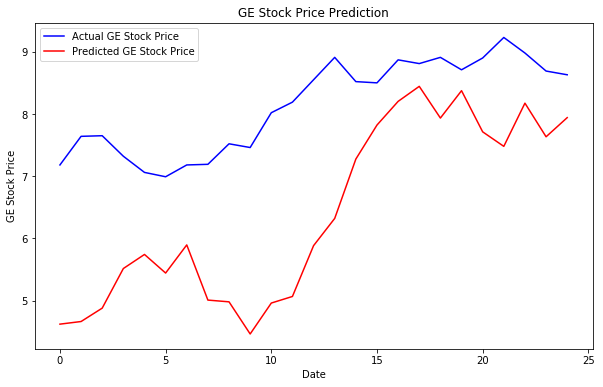

In [110]:
plt.figure(figsize=(10,6))  
plt.plot(test_Y, color='blue', label='Actual GE Stock Price')  
plt.plot(predictions , color='red', label='Predicted GE Stock Price')  
plt.title('GE Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('GE Stock Price')  
plt.legend()  
plt.show()  